In [1]:
%matplotlib inline

from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad
from tqdm import *

In [ ]:
filename_3fgl = 'gll_psc_v16.fit'
hdul_3fgl = fits.open(filename_3fgl)
hdul_3fgl[1].header

In [3]:
energy_bins = [100,300,1000,3000,10000,100000]
flux = []
for i in range(len(energy_bins)-1):
    flux.append(np.zeros(len(hdul_3fgl[1].data['Flux1000'])))
for i in range(len(energy_bins)-1):
    flux[i:]+=np.array(hdul_3fgl[1].data['Flux'+str(energy_bins[i])+'_'+str(energy_bins[i+1])])

In [4]:
flux_tot = []
for i in tqdm_notebook(range(len(flux[0]))):
    flux_temp = []
    for j in range(len(energy_bins)-1):
        flux_temp.append(flux[j][i])
    flux_interp = interp1d(energy_bins[1:], flux_temp)
    flux_tot.append(flux_interp(20e3) - flux_interp(2e3))

-10.862336890472442


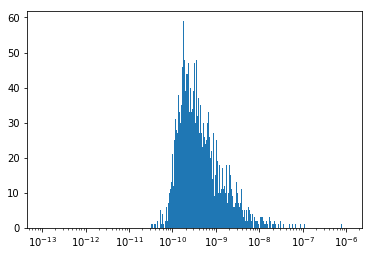

In [5]:
print(np.log10(min(flux_tot)))
bins = plt.hist(flux_tot, bins=np.logspace(-13, -6, 500 ));
plt.xscale("log")

-9.759519038076153


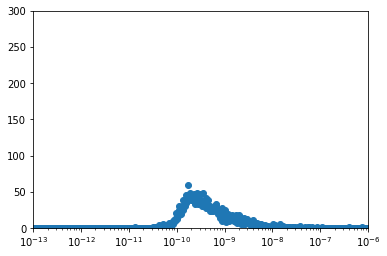

In [6]:
F = bins[1][:-1]
dN = bins[0]
dF = np.diff(bins[1])
plt.scatter(F, dN)
#plt.yscale("log")
plt.xscale("log")
plt.ylim(0, 300)
plt.xlim(1e-13, 1e-6)
print(np.log10(F[np.argmax(dN)]))

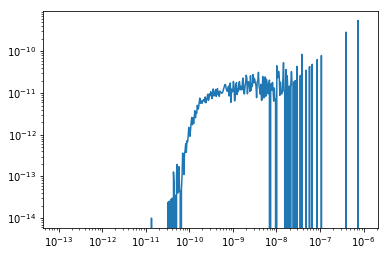

In [7]:
plt.plot(F, F**2*dN/dF/(4*np.pi*(180/np.pi)**2))
plt.yscale("log")
plt.xscale("log")